# Results
### Models used with hyperparameters

<br>1.  Linear Regression
<br>2.  Polynomial Regression, Hyperparameters = Polynomial degree
<br>3.  Ridge, Hyperparameters = Alpha 
<br>4.  Lasso, Hyperparameters = Alpha 
<br>5.  Elastic Net, Hyperparameters = Alpha, L1 ratio 
<br>6.  Stochastic Gradient Descent, Hyperparameters = Eta, penaly(l1, l2), alpha
<br>7.  KNN Regression, Hyperparameters = No. of neighbors and metric
<br>8.  Decision Tree, Hyperparameters = max_depth, min_samples_split and min_samples_leaf
<br>9.  SVM Regression : Linear, Hyperparameters = C
<br>10. SVM Regression with rbf, Kernel (C, gamma)
<br>11. SVM Regression with sigmoid Kernels( C, gamma)
<br>12. Bagging  (Decision tree)
<br>13. Random Forest 
<br>14. Ada Boost
<br>15. GradientBoost
<br>16. Extra-Trees
<br>17. XGBoost
    
    
    
## Best Model parameters <br>
<b>The best model choosen based on MAE score is : SVM Linear Regression  </b>
* The MAE score is: -680.173679

* The top 5 models are:- SVM Linear Regression  :-680.173679
                         SVM Kernel Regression  :-680.525111	
                         SVM RBF Regression     :-686.398465
                         XG Boost               :-693.688922
                         Ada boost using        :-701.092288
                         decision tree


The model I used on Test prediction is XG Boost.

For Feature engine step I used Decision tree discretizer for Numerical variables and Winsorizer for discrete variables
Also used standard scaler for scaling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from pathlib import Path

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [4]:
data=pd.read_csv('C:/Users/Adithya Arunganesh/Desktop/Machine Learning/Exam 1/train_rev.csv')


In [5]:
make_pred=pd.read_csv('C:/Users/Adithya Arunganesh/Desktop/Machine Learning/Exam 1/test_rev.csv')

In [4]:
data.shape

(21788, 60)

In [5]:
test.shape

(12784, 59)

In [6]:
data.describe()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,target
count,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000,21788.000000
mean,12527.318524,10.411924,545.443593,0.531209,0.971819,0.674632,10.552644,3.294704,4.302001,1.197861,4.557895,7.203782,0.051818,0.179916,0.164770,0.055214,0.186662,0.225124,26.164127,1136.302291,309.943138,13268.079769,751920.309345,256557.276152,1083.283319,5444.880349,3047.327983,3479.804844,9258.813870,5632.455279,0.166147,0.187030,0.190472,0.186525,0.144437,0.058656,0.066734,0.125390,0.186807,0.141950,0.226433,0.209697,0.235113,0.441301,0.119266,0.039604,0.016496,0.684274,0.287362,0.352851,0.095148,0.754631,-0.257667,-0.518552,-0.107005,0.275561,0.068121,0.342392,0.152472,1614.389756
std,7232.717093,2.110588,457.135979,0.134866,0.165492,0.150979,10.676160,3.858330,8.093560,3.951478,0.824050,1.914465,0.221664,0.384126,0.370981,0.228402,0.389649,0.417673,69.706246,3862.104759,582.004252,57935.393752,214434.934746,133453.903373,1106.710541,5566.651077,1203.560612,16729.229048,37553.068221,21170.631373,0.372221,0.389944,0.392682,0.389538,0.351541,0.234985,0.249566,0.331168,0.264054,0.221004,0.288919,0.286910,0.289205,0.114681,0.095842,0.017370,0.010666,0.188526,0.155832,0.102585,0.071154,0.244667,0.127056,0.289915,0.094917,0.320558,0.261903,0.189458,0.223573,1013.407090
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018183,0.018182,0.018182,0.018182,0.018182,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,6269.750000,9.000000,250.000000,0.471674,1.000000,0.627745,4.000000,1.000000,1.000000,0.000000,4.482099,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.440476,0.000000,843300.000000,171922.499975,0.000000,3530.833023,2348.912241,612.000000,995.000000,933.437500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025064,0.025012,0.028572,0.025394,0.028574,0.393719,0.058174,0.028424,0.009569,0.600000,0.185185,0.306061,0.050000,0.600000,-0.325000,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,899.000000
50%,12538.500000,10.000000,414.000000,0.538824,1.000000,0.691260,7.000000,3.000000,1.000000,0.000000,4.668919,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,656.000000,235.474375,1400.000000,843300.000000,241578.571450,1000.414286,4223.373406,2809.193219,1100.000000,2700.000000,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033428,0.033343,0.040033,0.040000,0.050000,0.450714,0.118507,0.038999,0.015228,0.714286,0.277778,0.357573,0.100000,0.800000,-0.250571,-0.500000,-0.100000,0.100000,0.000000,0.500000,0.000000,1300.000000
75%,18816.250000,12.000000,716.000000,0.606965,1.000000,0.75555

In [7]:
data.head()

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,target
0,1,13,472,0.516129,1.0,0.677656,7,3,1,0,4.843220,4,0,0,0,0,0,1,-1,0.0,-1.000000,67700,843300,417575.0000,2185.450945,3467.837885,2639.664540,568.0,5800.0,2323.666667,0,0,0,1,0,0,0,0,0.050001,0.050000,0.799993,0.050000,0.050006,0.408591,0.047852,0.012712,0.004237,0.750000,0.250000,0.278283,0.100000,0.6,-0.523810,-0.714286,-0.333333,0.000000,0.000000,0.500000,0.000000,1600
1,2,12,701,0.522963,1.0,0.677201,10,5,10,1,4.763195,9,0,0,0,0,0,1,-1,804.0,193.625000,0,843300,209755.5556,0.000000,4101.893971,2114.472589,0.0,0.0,0.000000,0,0,0,1,0,0,0,0,0.244963,0.022224,0.571054,0.022223,0.139535,0.406442,0.185152,0.051355,0.007133,0.878049,0.121951,0.368439,0.033333,1.0,-0.275000,-0.600000,-0.050000,0.222222,0.244444,0.277778,0.244444,1700
2,3,8,174,0.724551,1.0,0.896226,1,1,1,0,4.385057,5,0,0,0,0,1,0,217,342.0,279.500000,0,617900,142120.0000,0.000000,3159.522593,2108.652601,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.040030,0.040623,0.040019,0.040019,0.839309,0.255628,0.029437,0.011494,0.022989,0.333333,0.666667,0.366667,0.333333,0.4,-0.102381,-0.166667,-0.071429,0.000000,0.000000,0.500000,0.000000,3100
3,4,10,2347,0.359368,1.0,0.551497,36,8,3,1,4.907542,6,0,0,1,0,0,0,-1,1100.0,271.666667,27700,843300,327316.6667,3193.319812,6003.888889,4260.332820,1700.0,25900.0,10233.333330,0,0,0,0,0,0,1,1,0.700278,0.198502,0.033334,0.033334,0.034553,0.479196,0.171219,0.051129,0.014913,0.774194,0.225806,0.374936,0.033333,1.0,-0.245176,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1800
4,5,7,280,0.563636,1.0,0.700599,8,5,1,0,5.132143,8,0,0,1,0,0,0,-1,718.0,263.698750,4800,843300,222525.0000,1838.148148,3582.545966,2503.522903,860.0,7900.0,2940.000000,0,1,0,0,0,0,0,0,0.475835,0.025101,0.279301,0.025000,0.194762,0.350535,0.166043,0.039286,0.000000,1.000000,0.000000,0.288430,0.100000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2900


In [8]:
data.isnull().sum()

id        0
v1        0
v2        0
v3        0
v4        0
v5        0
v6        0
v7        0
v8        0
v9        0
v10       0
v11       0
v12       0
v13       0
v14       0
v15       0
v16       0
v17       0
v18       0
v19       0
v20       0
v21       0
v22       0
v23       0
v24       0
v25       0
v26       0
v27       0
v28       0
v29       0
v30       0
v31       0
v32       0
v33       0
v34       0
v35       0
v36       0
v37       0
v38       0
v39       0
v40       0
v41       0
v42       0
v43       0
v44       0
v45       0
v46       0
v47       0
v48       0
v49       0
v50       0
v51       0
v52       0
v53       0
v54       0
v55       0
v56       0
v57       0
v58       0
target    0
dtype: int64

In [101]:
data=data.drop(columns='id ', axis=1)

In [102]:
data.head()

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,target
0,13,472,0.516129,1.0,0.677656,7,3,1,0,4.843220,4,0,0,0,0,0,1,-1,0.0,-1.000000,67700,843300,417575.0000,2185.450945,3467.837885,2639.664540,568.0,5800.0,2323.666667,0,0,0,1,0,0,0,0,0.050001,0.050000,0.799993,0.050000,0.050006,0.408591,0.047852,0.012712,0.004237,0.750000,0.250000,0.278283,0.100000,0.6,-0.523810,-0.714286,-0.333333,0.000000,0.000000,0.500000,0.000000,1600
1,12,701,0.522963,1.0,0.677201,10,5,10,1,4.763195,9,0,0,0,0,0,1,-1,804.0,193.625000,0,843300,209755.5556,0.000000,4101.893971,2114.472589,0.0,0.0,0.000000,0,0,0,1,0,0,0,0,0.244963,0.022224,0.571054,0.022223,0.139535,0.406442,0.185152,0.051355,0.007133,0.878049,0.121951,0.368439,0.033333,1.0,-0.275000,-0.600000,-0.050000,0.222222,0.244444,0.277778,0.244444,1700
2,8,174,0.724551,1.0,0.896226,1,1,1,0,4.385057,5,0,0,0,0,1,0,217,342.0,279.500000,0,617900,142120.0000,0.000000,3159.522593,2108.652601,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.040030,0.040623,0.040019,0.040019,0.839309,0.255628,0.029437,0.011494,0.022989,0.333333,0.666667,0.366667,0.333333,0.4,-0.102381,-0.166667,-0.071429,0.000000,0.000000,0.500000,0.000000,3100
3,10,2347,0.359368,1.0,0.551497,36,8,3,1,4.907542,6,0,0,1,0,0,0,-1,1100.0,271.666667,27700,843300,327316.6667,3193.319812,6003.888889,4260.332820,1700.0,25900.0,10233.333330,0,0,0,0,0,0,1,1,0.700278,0.198502,0.033334,0.033334,0.034553,0.479196,0.171219,0.051129,0.014913,0.774194,0.225806,0.374936,0.033333,1.0,-0.245176,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,1800
4,7,280,0.563636,1.0,0.700599,8,5,1,0,5.132143,8,0,0,1,0,0,0,-1,718.0,263.698750,4800,843300,222525.0000,1838.148148,3582.545966,2503.522903,860.0,7900.0,2940.000000,0,1,0,0,0,0,0,0,0.475835,0.025101,0.279301,0.025000,0.194762,0.350535,0.166043,0.039286,0.000000,1.000000,0.000000,0.288430,0.100000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,2900


Variable types

In [103]:
discrete= [var for var in data.columns if data[var].dtype != 'O'
          and len(data[var].unique()) < 20]

print('There are {} discrete variables, they are: {}' .format(len(discrete),discrete))

There are 16 discrete variables, they are: ['v1', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37']


In [104]:
numerical=[var for var in data.columns if data[var].dtype!= 'O'
          and var not in discrete
          and var not in ['target']]

print('There are {} continuous variables, they are: {}' .format(len(numerical),numerical))

There are 42 continuous variables, they are: ['v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56', 'v57', 'v58']


In [105]:
categorical=[var for var in data.columns if data[var].dtype== 'O'
            and var not in discrete
            and var not in numerical]

print('There are {} continuous variables, they are: {}' .format(len(categorical),categorical))

There are 0 continuous variables, they are: []


Visualize

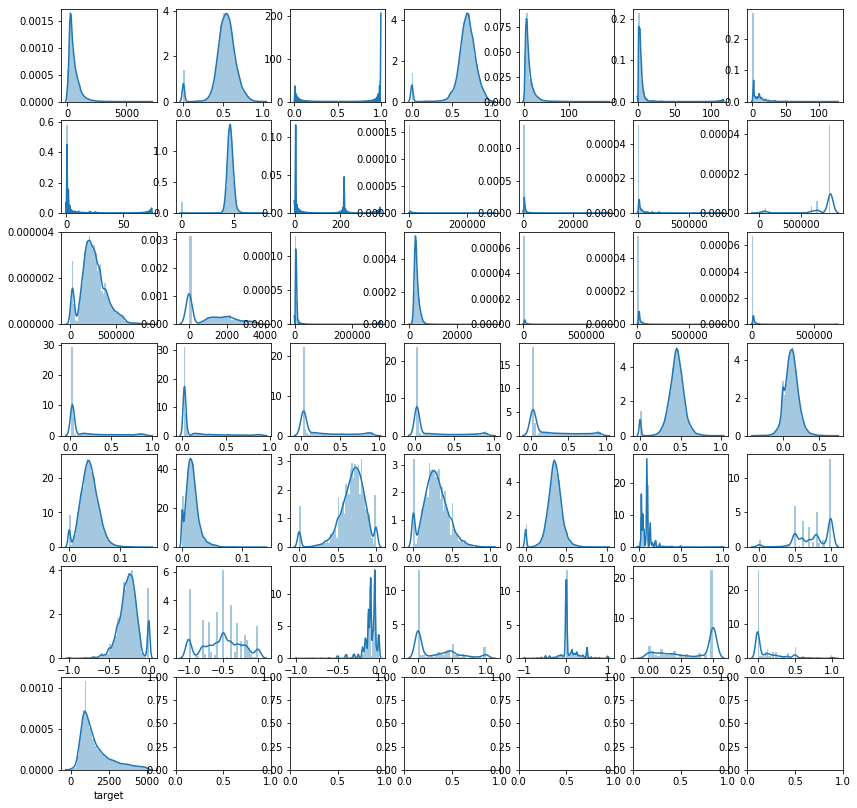

In [355]:
# Plot for continuous variables 
import seaborn as sns

fig, axs=plt.subplots(ncols=7, nrows=7, figsize=(14,14))
axs=axs.flatten()

for i, var in enumerate(numerical+['target']):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

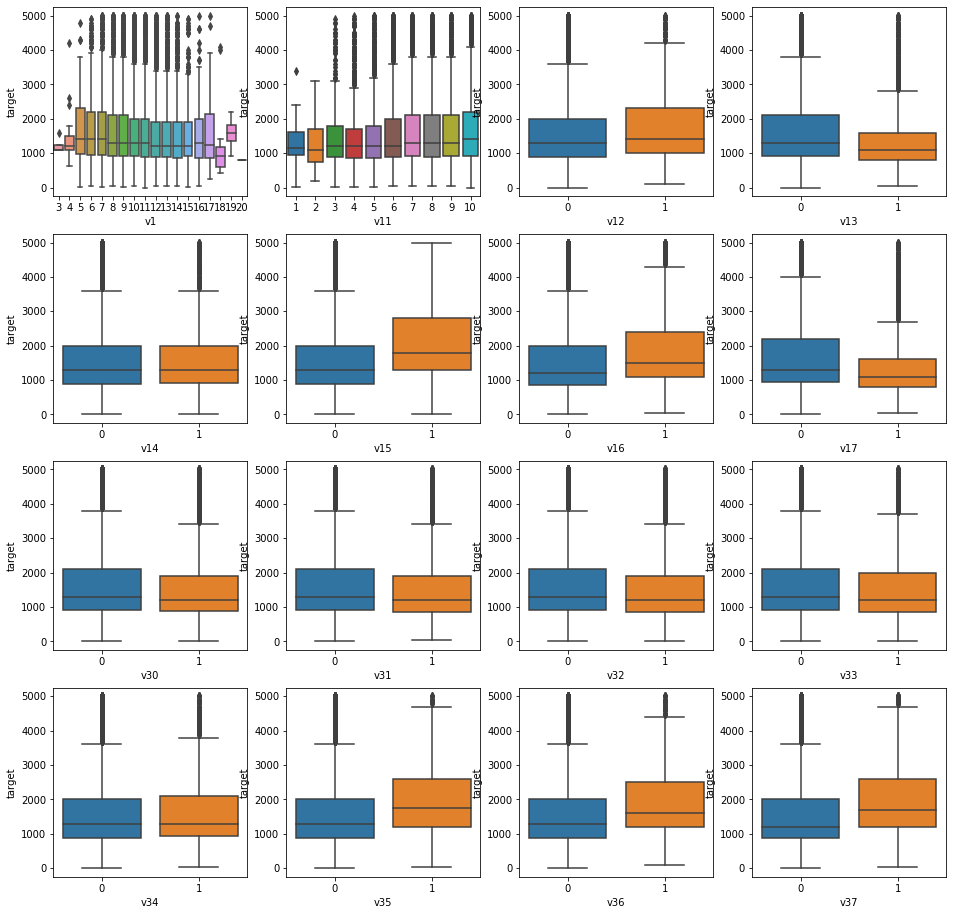

In [356]:

#Plotting outliers

fig, axs=plt.subplots(ncols=4, nrows=4, figsize=(16,16))
axs=axs.flatten()

for i, var in enumerate(discrete):
    if var != 'target':
        sns.boxplot(x=var, y='target', data=data, ax=axs[i]);
        
    

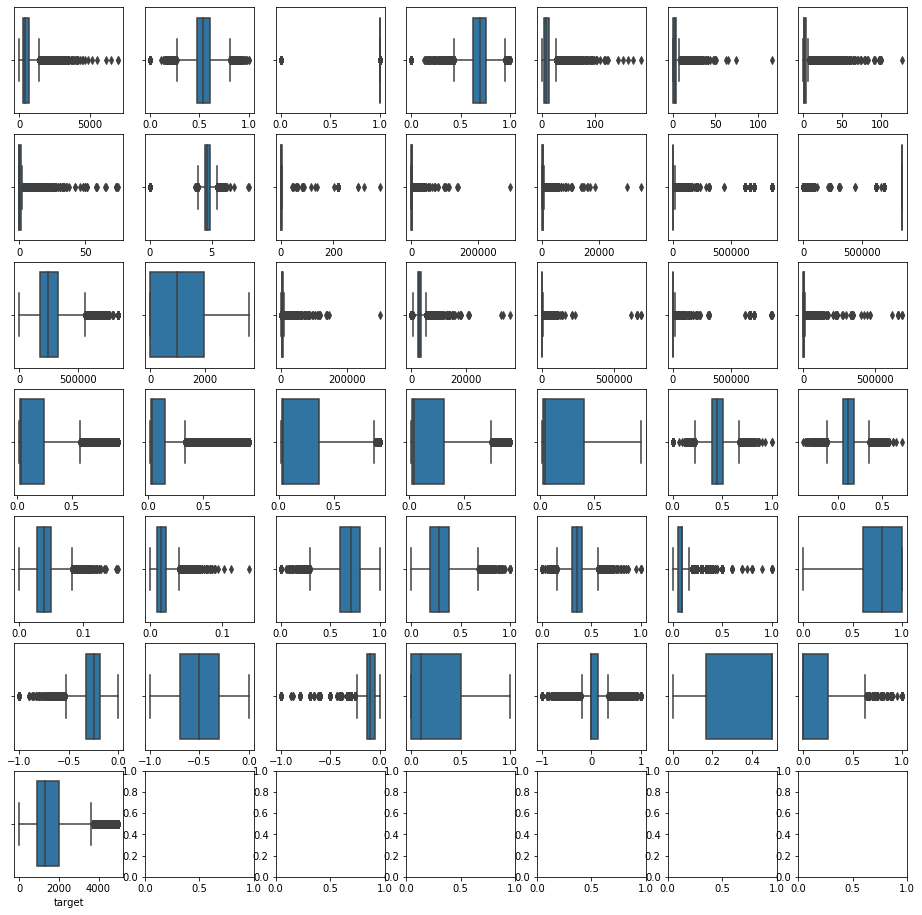

In [357]:
fig, axs=plt.subplots(ncols=7, nrows=7, figsize=(16,16))
axs=axs.flatten()

for i, var in enumerate(numerical+['target']):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i]);

Feature Engineering

In [106]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [107]:
import feature_engine
from sklearn.pipeline import Pipeline
from feature_engine.outlier_removers import Winsorizer
from sklearn.model_selection import train_test_split
from feature_engine.variable_transformers import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler
from feature_engine.discretisers import DecisionTreeDiscretiser

Data Split

In [108]:
X=data.drop(['target'], axis=1)
y=data.target

In [109]:
X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [110]:
X.shape, y.shape

((21788, 58), (21788, 1))

In [111]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2)

In [112]:
 pipe_pre=Pipeline([
    # Transforming Numerical Variables
    #('yjt', YeoJohnsonTransformer(variables = numerical)),

    ('winsorizer', Winsorizer(distribution='skewed', tail='both', fold=3, variables=discrete)),
     
    # discretisation and encoding
    ('treeDisc',  DecisionTreeDiscretiser(cv=10, scoring='neg_mean_squared_error',
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4,5,6]},variables=numerical)),
    # feature Scaling
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler())),
 ])

In [113]:
pipe_pre.fit(X_train, y_train)

Pipeline(steps=[('winsorizer',
                 Winsorizer(distribution='skewed', tail='both',
                            variables=['v1', 'v11', 'v12', 'v13', 'v14', 'v15',
                                       'v16', 'v17', 'v30', 'v31', 'v32', 'v33',
                                       'v34', 'v35', 'v36', 'v37'])),
                ('treeDisc',
                 DecisionTreeDiscretiser(cv=10,
                                         param_grid={'max_depth': [1, 2, 3, 4,
                                                                   5, 6]},
                                         variables=['v2', 'v3', 'v4', 'v5',
                                                    'v6', 'v7', 'v8', 'v9',
                                                    'v10', 'v18', 'v19', 'v20',
                                                    'v21', 'v22...24',
                                                    'v25', 'v26', 'v27', 'v28',
                                                    'v29', '

In [114]:
#Applying Transformations

X_train=pipe_pre.transform(X_train)
X_test=pipe_pre.transform(X_test)

In [120]:
X_train

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58
20576,0.757187,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,0.669926,0.142468,0.094415,0.843908,0.414985,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-2.173179,-1.180976,-0.031749,-0.374070,0.679291,-0.020155,0.454619,0.529470,-1.255266,-0.838282,-0.977410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.090420,0.681123,0.069050,0.710047,-0.051728,-1.218655,-1.229589,-0.869581,-1.282610,-1.211690,-1.290718,-0.864668,-0.382895,1.066705,0.363675,0.042398,-1.281424,-0.317215,-0.143788,-0.311203,-0.201063
10,0.757187,-0.425111,-0.458529,-0.171321,-0.583136,-0.266692,-0.073513,-0.808093,0.094415,0.843908,1.462286,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-0.012028,-0.031749,-0.374070,-0.927675,-0.020155,0.454619,0.529470,-0.614916,-1.889306,-1.848594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732632,-0.290488,0.790553,0.406856,-0.051728,-1.218655,0.813280,1.149979,0.459762,-0.947959,0.774763,-0.864668,1.973605,-0.875285,0.363675,-0.480296,-0.250035,0.844511,-0.143788,3.213337,-1.185551
20045,0.283044,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,0.669926,0.142468,0.094415,0.843908,-1.155967,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-1.180976,0.978633,-0.374070,0.679291,-0.085464,0.454619,1.442706,1.160578,1.450303,1.463140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732632,-0.290488,0.069050,-1.452519,0.123589,-1.218655,-1.229589,-0.869581,0.459762,0.834495,0.774763,-0.864668,-0.908702,-0.875285,0.363675,0.895560,0.335352,-1.604529,-0.143788,-0.311203,-1.185551
21411,0.283044,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,-0.073513,-0.808093,0.094415,0.843908,-0.108666,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-1.180976,-0.031749,-0.374070,-0.927675,-0.020155,-1.369281,-1.094012,-0.102743,1.472265,1.463140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.090420,-1.986073,1.947468,0.710047,-0.051728,-1.218655,0.813280,1.149979,0.459762,0.834495,0.774763,-0.864668,-0.382895,-0.875285,0.363675,-1.862344,0.335352,-0.317215,-0.143788,-0.311203,-0.201063
14316,-1.139385,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,-0.073513,-0.808093,0.094415,-1.184963,-0.108666,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-0.012028,-0.031749,0.127225,-0.927675,-0.020155,-1.369281,-1.094012,-1.255266,0.587352,0.064667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.090420,2.249333,0.790553,0.406856,2.196041,-1.218655,0.813280,1.149979,0.459762,-0.947959,0.774763,-0.864668,-0.382895,1.066705,0.363675,-0.480296,-0.250035,-0.317215,-0.143788,-0.311203,-1.185551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,-0.665242,-0.425111,-0.458529,-0.171321,-0.583136,1.018547,-0.950085,-0.808093,0.094415,-1.184963,-0.108666,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,1.783691,1.024816,-0.031749,-0.374070,2.071504,-0.020155,0.454619,-1.094012,-0.202425,-0.221416,-0.195323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732632,2.249333,1.947468,0.710047,-0.051728,-1.218655,-1.229589,-0.869581,0.459762,-1.211690,-1.290718,-0.864668,-0.382895,-0.875285,0.363675,-1.862344,0.335352,-0.317215,-0.143788,-0.311203,-0.201063
9564,1.231330,-0.425111,-0.458529,-0.171321,-0.583136,-0.266692,-0.073513,1.626270,0.094415,0.843908,1.462286,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-1.180976,0.978633,-0.374070,0.679291,-0.085464,1.423347,1.442706,-0.614916,2.787063,1.463140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.678978,0.681123,0.069050,0.710047,-0.051728,-1.218655,-1.229589,-0.869581,0.459762,-1.211690,-1.290718,0.871998,1.973605,1.066705,0.363675,-1.862344,0.630931,-0.317215,-0.143788,-0.311203,-0.201063
15708,1.231330,0.465869,-0.458529,-0.171321,-0.583136,-0.266692,-0.660099,-0.808093,0.094415,-1.184963,-1.155967,0.0,0.0,0.0,0.0,0.0,0.0,-0.36337

## Regression Models

1. Linear Regression

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [28]:
linear=LinearRegression()
linear_cv=cross_val_score(linear, X_train, y_train, cv=5)
linear_fit=linear.fit(X_train, y_train)



#Mean Cross Validation score
print('The Mean Cross-validation score is: ',linear_cv.mean())

#Best performance
print('Train Performance: {:.3f}'. format(linear_fit.score(X_train,y_train)))
print('Test Performance: {:.3f}'. format(linear_fit.score(X_test,y_test)))


The Mean Cross-validation score is:  0.12350822400314901
Train Performance: 0.130
Test Performance: 0.099


2. Polynomial Regression

In [88]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

poly=PolynomialFeatures(), 

poly_param={'polynomialfeatures__degree':[2],
            'polynomialfeatures__interaction_only':['True']}

poly_pipe=make_pipeline(PolynomialFeatures(), LinearRegression())

poly_grid=GridSearchCV(poly_pipe, poly_param, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')

poly_grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'polynomialfeatures__degree': [2],
                         'polynomialfeatures__interaction_only': ['True']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [193]:
# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(poly_grid.best_score_))


#Best parameters
print('The best parameters are: ', poly_grid.best_params_)

#Best performance
print("Poly Performance Train : ", poly_grid.score(X_train,y_train))
print("Poly Performance Test : ", poly_grid.score(X_test,y_test))
print("Validation score: {:.2f}".format(poly_grid.score(X_test,y_test)))

Best Mean Cross-validation score: -92647728779.08
The best parameters are:  {'polynomialfeatures__degree': 2, 'polynomialfeatures__interaction_only': 'True'}
Poly Performance Train :  -686.8226011187608
Poly Performance Test :  -737.4510096374484
Validation score: -737.45


3.Ridge

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge(random_state=40, max_iter=1000)

ridge_param={'alpha':[10,20,30]}

ridge_grid=GridSearchCV(ridge, ridge_param, cv=10, return_train_score=True,scoring='neg_mean_absolute_error')

ridge_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=1000, random_state=40),
             param_grid={'alpha': [10, 20, 30]}, return_train_score=True,
             scoring='neg_mean_absolute_error')

In [191]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',ridge_grid.best_score_)

#Best parameters
print('The best parameters are: ', ridge_grid.best_params_)

#Best performance
print('Train Performance: {:.3f}'. format(ridge_grid.score(X_train,y_train)))
print('Test Performance: {:.3f}'. format(ridge_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((ridge_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -715.8209627616923
The best parameters are:  {'alpha': 10}
Train Performance: -713.896
Test Performance: -728.063
Validation score: -728.06


4. Lasso

In [29]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(random_state=0, max_iter=1000)

lasso_param={'alpha':[10,15]}

lasso_grid=GridSearchCV(lasso, lasso_param, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')

lasso_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=0),
             param_grid={'alpha': [10, 15]}, return_train_score=True,
             scoring='neg_mean_absolute_error')

In [30]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',lasso_grid.best_score_)

#Best parameters
print('The best parameters are: ', lasso_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(lasso_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(lasso_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((lasso_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -725.9454910754989
The best parameters are:  {'alpha': 10}
Train Performance: -724.10
Test Performance: -704.09
Validation score: -704.09


5. Elastic Net

In [31]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(max_iter=10000)

elastic_param={'alpha':[10,20], 'l1_ratio' :[0.9, 0.95, 0.99, 0.99, 1.0]}

elastic_grid=GridSearchCV(elastic, elastic_param, cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
elastic_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [10, 20],
                         'l1_ratio': [0.9, 0.95, 0.99, 0.99, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [32]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',elastic_grid.best_score_)

#Best parameters
print('The best parameters are: ', elastic_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(elastic_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(elastic_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((elastic_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -725.9454910754989
The best parameters are:  {'alpha': 10, 'l1_ratio': 1.0}
Train Performance: -724.10
Test Performance: -704.09
Validation score: -704.09


6.SGD

In [33]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor(max_iter=10000)

sgd_param={'eta0':[0.01, 0.001, 0.0001, ], 
             'penalty' :['l1','l2'],
             'alpha' :[2,4,6]}

sgd_grid=GridSearchCV(sgd, sgd_param, cv=5, return_train_score=True, scoring='neg_mean_absolute_error')

sgd_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDRegressor(max_iter=10000),
             param_grid={'alpha': [2, 4, 6], 'eta0': [0.01, 0.001, 0.0001],
                         'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [34]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',sgd_grid.best_score_)

#Best parameters  
print('The best parameters are: ', sgd_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(sgd_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(sgd_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((sgd_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -723.8286931583068
The best parameters are:  {'alpha': 2, 'eta0': 0.0001, 'penalty': 'l1'}
Train Performance: -721.80
Test Performance: -703.81
Validation score: -703.81


7. KNN Regression

In [56]:
from sklearn.neighbors import KNeighborsRegressor

knn=KNeighborsRegressor()

knn_param={'n_neighbors': range(100,200,10)}

knn_grid=GridSearchCV(knn, knn_param, cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(100, 200, 10)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [188]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',knn_grid.best_score_)

#Best parameters
print('The best parameters are: ', knn_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(knn_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(knn_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((knn_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -722.135808950086
The best parameters are:  {'n_neighbors': 100}
Train Performance: -714.04
Test Performance: -727.17
Validation score: -727.17


8. Decision Tree

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree=DecisionTreeRegressor(random_state=0)

tree_param= {'max_depth':range(1,10),
             "min_samples_split": range(1,10),
             "min_samples_leaf": range(1,50,5),
               }

tree_grid=GridSearchCV(tree, tree_param, cv=5, return_train_score=True,scoring='neg_mean_absolute_error')

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 50, 5),
                         'min_samples_split': range(1, 10)},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [36]:

#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',tree_grid.best_score_)

#Best parameters
print('The best parameters are: ', tree_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(tree_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(tree_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((tree_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -752.2352772010847
The best parameters are:  {'max_depth': 7, 'min_samples_leaf': 46, 'min_samples_split': 2}
Train Performance: -730.67
Test Performance: -715.38
Validation score: -715.38


9. SVM Regression-Linear

In [37]:

from sklearn.svm import LinearSVR

svr_linear=LinearSVR(max_iter=10000)

svr_linear_param= {'C': [1000,2000,3000]}

svr_linear_grid=GridSearchCV(svr_linear, svr_linear_param, cv=5, return_train_score=True, scoring='neg_mean_absolute_error')

svr_linear_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': [1000, 2000, 3000]}, return_train_score=True,
             scoring='neg_mean_absolute_error')

In [38]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',svr_linear_grid.best_score_)

#Best parameters
print('The best parameters are: ', svr_linear_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(svr_linear_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(svr_linear_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((svr_linear_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -688.2025200378191
The best parameters are:  {'C': 2000}
Train Performance: -685.62
Test Performance: -657.23
Validation score: -657.23



10. SVM Classification Kernel:rbf

In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel = 'rbf')

svr_rbf_param = {'C': [55000,60000],
                    'gamma':[0.0015,0.0016,0.0018]
                    }

svr_rbf_grid = GridSearchCV(svr_rbf, svr_rbf_param, cv=5, n_jobs=2, scoring='neg_mean_absolute_error')
svr_rbf_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(), n_jobs=2,
             param_grid={'C': [55000, 60000],
                         'gamma': [0.0015, 0.0016, 0.0018]},
             scoring='neg_mean_absolute_error')

In [40]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',svr_rbf_grid.best_score_)

#Best parameters
print('The best parameters are: ', svr_rbf_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(svr_rbf_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(svr_rbf_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((svr_rbf_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -695.7050078151511
The best parameters are:  {'C': 55000, 'gamma': 0.0015}
Train Performance: -637.13
Test Performance: -663.01
Validation score: -663.01


11. SVM Classification Kernel: Sigmoid

In [41]:
from sklearn.svm import SVR

svr_kernel = SVR(kernel = 'sigmoid')


svr_kernel_param = {'C': [3000,30000],
                    'gamma':[0.001,0.01,0.1]
                    }


svr_kernel_grid = GridSearchCV(svr_kernel, svr_kernel_param, cv=5, n_jobs=2, scoring='neg_mean_absolute_error')
svr_kernel_grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVR(kernel='sigmoid'), n_jobs=2,
             param_grid={'C': [3000, 30000], 'gamma': [0.001, 0.01, 0.1]},
             scoring='neg_mean_absolute_error')

In [42]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',svr_kernel_grid.best_score_)

#Best parameters
print('The best parameters are: ', svr_kernel_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(svr_kernel_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(svr_kernel_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((svr_kernel_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -688.6741418751005
The best parameters are:  {'C': 3000, 'gamma': 0.001}
Train Performance: -687.23
Test Performance: -657.40
Validation score: -657.40


12. Ensemble model

In [43]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.tree import DecisionTreeRegressor

bagr_tree=BaggingRegressor(base_estimator=DecisionTreeRegressor(),bootstrap=True, random_state=0, oob_score=True)

bagr_tree_param={'base_estimator__max_depth':[2,4,6],
                 'max_samples': [0.8,0.1,0.01],
                 'n_estimators': [50,100]}

bagr_tree_grid= GridSearchCV(bagr_tree, bagr_tree_param, cv=10, return_train_score=True, scoring='neg_mean_absolute_error')

bagr_tree_grid.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor(),
                                        oob_score=True, random_state=0),
             param_grid={'base_estimator__max_depth': [2, 4, 6],
                         'max_samples': [0.8, 0.1, 0.01],
                         'n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [45]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',bagr_tree_grid.best_score_)

#Best parameters
print('The best parameters are: ', bagr_tree_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(bagr_tree_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(bagr_tree_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((bagr_tree_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -737.2382965868383
The best parameters are:  {'base_estimator__max_depth': 6, 'max_samples': 0.1, 'n_estimators': 50}
Train Performance: -726.99
Test Performance: -710.52
Validation score: -710.52


13. Gradient Boost

In [46]:
from  sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor(random_state=42)
gbr_param = {
              'max_depth' : range(1,10),
              'n_estimators' : [75,100,150],
              'learning_rate' : [0.001,0.1,1],
             }
gbr_grid = GridSearchCV(gbr, gbr_param,cv=5, return_train_score=True,scoring='neg_mean_absolute_error')
gbr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.001, 0.1, 1],
                         'max_depth': range(1, 10),
                         'n_estimators': [75, 100, 150]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [47]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',gbr_grid.best_score_)

#Best parameters
print('The best parameters are: ', gbr_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(gbr_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(gbr_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((gbr_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -723.7856671331016
The best parameters are:  {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150}
Train Performance: -684.38
Test Performance: -700.91
Validation score: -700.91


# 14. XG Boost

In [115]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [116]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [117]:
xgbr= XGBRegressor(random_state=0,early_stopping_rounds=2, objective='reg:squarederror')
xgbr_param = {
             'max_depth' : [2,4,6],
              'n_estimators' : [10,25,50],
              'learning_rate' : [0.01,0.1,1],
              'min_child_weight' : [1,3,5],
             'subsample':[1,3,5]
             }
xgbr_grid = GridSearchCV(xgbr, xgbr_param,cv=6, return_train_score=True,scoring='neg_mean_absolute_error' )
xgbr_grid.fit(X_train,y_train)

[11:45:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par


[11:45:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some pa

[11:45:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:45:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:33] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:34] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:45:44] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:45:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:45:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:46:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:46:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:25] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:46:38] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:46:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:47] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:48] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:46:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:46:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:47:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:06] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:47:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:17] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:47:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:26] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:47:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:39] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:47:51] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:52] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:47:53] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:48:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:48:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:10] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:48:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:48:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:27] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:48:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:36] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:37] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:48:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:46] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:48:56] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:48:57] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

[11:49:07] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:49:08] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:49:09] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

GridSearchCV(cv=6,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=2, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    num_parallel_tree=None, random_state=0,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters

In [118]:
print("Validation score: {:.2f}".format((xgbr_grid.score(X_test,y_test))))#Mean Cross Validation score
print('Best Mean Cross-Validation score: {:.2f}'.format(xgbr_grid.best_score_))

#Best parameters
print('The best parameters are: ', xgbr_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(xgbr_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(xgbr_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((xgbr_grid.score(X_test,y_test))))

Validation score: -703.86
Best Mean Cross-Validation score: -696.47
The best parameters are:  {'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 3, 'n_estimators': 25, 'subsample': 1}
Train Performance: -663.50
Test Performance: -703.86
Validation score: -703.86


15. Extra Tree

In [52]:
from  sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

etr = ExtraTreesRegressor(random_state=42)
etr_param = { 
    'n_estimators': [500,750,1000],
    'max_features': ['auto', 'log2'],
    'max_depth' : [2,4,6]
}

etr_grid = GridSearchCV(etr, etr_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
etr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [500, 750, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [53]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',etr_grid.best_score_)

#Best parameters
print('The best parameters are: ', etr_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(etr_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(etr_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((etr_grid.score(X_test,y_test))))

Best Mean Cross-Validation score:  -744.2768133627005
The best parameters are:  {'max_depth': 6, 'max_features': 'auto', 'n_estimators': 1000}
Train Performance: -729.84
Test Performance: -710.08
Validation score: -710.08


16. Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rfr =RandomForestRegressor(random_state=42)
rfr_param = { 
    'n_estimators': [1250,1500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6]
}

rfr_grid = GridSearchCV(rfr, rfr_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
rfr_grid.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',rfr_grid.best_score_)

#Best parameters
print('The best parameters are: ', rfr_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(rfr_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(rfr_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((rfr_grid.score(X_test,y_test))))

17. Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

adr_tree = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),random_state=42)
adr_tree_param = {
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [8,10],
              'n_estimators' : [100,200,400],
              'learning_rate' : [0.0001,0.001],
             }
adr_tree_grid = GridSearchCV(adr_tree, adr_tree_param,cv=10, return_train_score=True, scoring='neg_mean_absolute_error')
adr_tree_grid.fit(X_train,y_train)

In [ ]:
#Mean Cross Validation score
print('Best Mean Cross-Validation score: ',adr_tree_grid.best_score_)

#Best parameters
print('The best parameters are: ', adr_tree_grid.best_params_)

#Best performance
print('Train Performance: {:.2f}'. format(adr_tree_grid.score(X_train,y_train)))
print('Test Performance: {:.2f}'. format(adr_tree_grid.score(X_test,y_test)))
print("Validation score: {:.2f}".format((adr_tree_grid.score(X_test,y_test))))

Summary

In [56]:
regressors={ #'poly':poly_grid,
             #'ridge':ridge_grid,
             'laaso':lasso_grid,
             'elastic':elastic_grid,
             'sgd':sgd_grid,
             #'knn':knn_grid,
             'tree':tree_grid,
             'svr_linear':svr_linear_grid,
             'svr_kernel':svr_kernel_grid,
             'svr_rbf':svr_rbf_grid,
             'bagr_tree':bagr_tree_grid,
             #'rfr': rfr_grid,
             'etr': etr_grid,
             #'adr_tree':adr_tree_grid,
             'gbr': gbr_grid,
             'xgbr': xgbr_grid}

In [58]:
regressors.keys()

dict_keys(['laaso', 'elastic', 'sgd', 'tree', 'svr_linear', 'svr_kernel', 'svr_rbf', 'bagr_tree', 'etr', 'gbr', 'xgbr'])

In [57]:
results_mean_std = []
for  key, value in regressors.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [59]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [60]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
4,svr_linear,-688.202520,12.854307
5,svr_kernel,-688.674142,12.616506
6,svr_rbf,-695.705008,12.518598
10,xgbr,-703.897292,11.071961
9,gbr,-723.785667,10.106365
2,sgd,-723.828693,8.748663
0,laaso,-725.945491,8.413616
1,elastic,-725.945491,8.413616
7,bagr_tree,-737.238297,12.127494
8,etr,-744.276813,7.237959


In [61]:
import pandas as pd
import numpy as np

predictions_all={}
for key, value in regressors.items():
    best_model=value.best_estimator_
    
    predictions=best_model.predict(X_test)
    
    predictions_all[key]=predictions

In [248]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

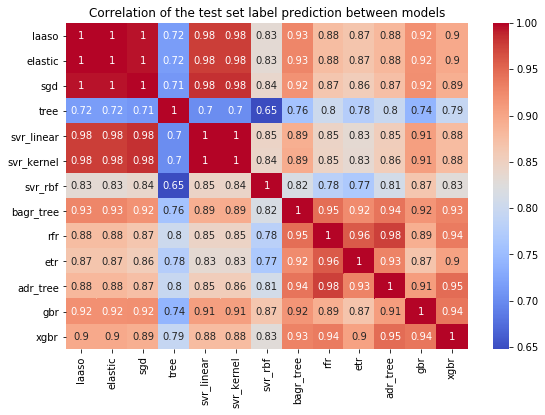

In [249]:
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [250]:
def get_redundant_pairs(df):
    '''get diagonal data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAiMAAAFpCAYAAABOASgmAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjMsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+AADFEAAAQbklEQVR4nO3dX4jl91nH8c/TrFFMaytmhZI/JuLWuhShdYiRgm1plSQXm5sqCRSthC6oqWCLEKnEkl7ZIoIQbVctVcHG6IUushJBIxUxJVuqoUkJrGltlgjZ1pib0qbRx4uZlnEyu/PL9sw+y5nXCwbO75zvnHnIl5l553fO/La6OwAAU14xPQAAcLCJEQBglBgBAEaJEQBglBgBAEaJEQBg1J4xUlUfr6pnq+pz53m8qup3q+pMVT1WVW9a/ZgAwLpacmbkE0luucDjtyY5svVxPMnvf/tjAQAHxZ4x0t2fSvJfF1hye5I/6U2PJHlNVb12VQMCAOttFe8ZuSbJ09uOz27dBwCwp0MreI7a5b5drzFfVcez+VJOrrrqqh97/etfv4IvDwBM+8xnPvPl7j58MZ+7ihg5m+S6bcfXJnlmt4XdfSLJiSTZ2Njo06dPr+DLAwDTquo/LvZzV/EyzckkP7f1VzU3J3m+u/9zBc8LABwAe54ZqapPJnlrkqur6myS30zyHUnS3R9NcirJbUnOJPlqkl/Yr2EBgPWzZ4x09517PN5JfnllEwEAB4orsAIAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBqUYxU1S1V9WRVnamqe3Z5/PqqeriqPltVj1XVbasfFQBYR3vGSFVdkeT+JLcmOZrkzqo6umPZbyR5sLvfmOSOJL+36kEBgPW05MzITUnOdPdT3f1CkgeS3L5jTSf5nq3br07yzOpGBADW2aEFa65J8vS247NJfnzHmg8m+buqem+Sq5K8YyXTAQBrb8mZkdrlvt5xfGeST3T3tUluS/KnVfWS566q41V1uqpOnzt37uVPCwCsnSUxcjbJdduOr81LX4a5K8mDSdLd/5Lku5JcvfOJuvtEd29098bhw4cvbmIAYK0siZFHkxypqhur6spsvkH15I41X0ry9iSpqh/JZow49QEA7GnPGOnuF5PcneShJJ/P5l/NPF5V91XVsa1l70/ynqr6tySfTPLu7t75Ug4AwEsseQNruvtUklM77rt32+0nkrx5taMBAAeBK7ACAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKPECAAwSowAAKMWxUhV3VJVT1bVmaq65zxrfraqnqiqx6vqz1Y7JgCwrg7ttaCqrkhyf5KfSnI2yaNVdbK7n9i25kiSX0/y5u5+rqq+f78GBgDWy5IzIzclOdPdT3X3C0keSHL7jjXvSXJ/dz+XJN397GrHBADW1ZIYuSbJ09uOz27dt93rkryuqv65qh6pqlt2e6KqOl5Vp6vq9Llz5y5uYgBgrSyJkdrlvt5xfCjJkSRvTXJnkj+sqte85JO6T3T3RndvHD58+OXOCgCsoSUxcjbJdduOr03yzC5r/rq7v9HdX0jyZDbjBADggpbEyKNJjlTVjVV1ZZI7kpzcseavkrwtSarq6my+bPPUKgcFANbTnjHS3S8muTvJQ0k+n+TB7n68qu6rqmNbyx5K8pWqeiLJw0l+rbu/sl9DAwDro7p3vv3j0tjY2OjTp0+PfG0AYLWq6jPdvXExn+sKrADAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIwSIwDAKDECAIxaFCNVdUtVPVlVZ6rqnguse2dVdVVtrG5EAGCd7RkjVXVFkvuT3JrkaJI7q+roLuteleRXknx61UMCAOtryZmRm5Kc6e6nuvuFJA8kuX2XdR9K8uEkX1vhfADAmlsSI9ckeXrb8dmt+76lqt6Y5Lru/psLPVFVHa+q01V1+ty5cy97WABg/SyJkdrlvv7Wg1WvSPI7Sd6/1xN194nu3ujujcOHDy+fEgBYW0ti5GyS67YdX5vkmW3Hr0ryhiT/WFVfTHJzkpPexAoALLEkRh5NcqSqbqyqK5PckeTkNx/s7ue7++ruvqG7b0jySJJj3X16XyYGANbKnjHS3S8muTvJQ0k+n+TB7n68qu6rqmP7PSAAsN4OLVnU3aeSnNpx373nWfvWb38sAOCgcAVWAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARokRAGCUGAEARi2Kkaq6paqerKozVXXPLo+/r6qeqKrHqurvq+oHVj8qALCO9oyRqroiyf1Jbk1yNMmdVXV0x7LPJtno7h9N8pdJPrzqQQGA9bTkzMhNSc5091Pd/UKSB5Lcvn1Bdz/c3V/dOnwkybWrHRMAWFdLYuSaJE9vOz67dd/53JXkb7+doQCAg+PQgjW1y32968KqdyXZSPKW8zx+PMnxJLn++usXjggArLMlZ0bOJrlu2/G1SZ7Zuaiq3pHkA0mOdffXd3ui7j7R3RvdvXH48OGLmRcAWDNLYuTRJEeq6saqujLJHUlObl9QVW9M8rFshsizqx8TAFhXe8ZId7+Y5O4kDyX5fJIHu/vxqrqvqo5tLftIklcm+Yuq+teqOnmepwMA+H+WvGck3X0qyakd99277fY7VjwXAHBAuAIrADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAo8QIADBKjAAAoxbFSFXdUlVPVtWZqrpnl8e/s6r+fOvxT1fVDaseFABYT3vGSFVdkeT+JLcmOZrkzqo6umPZXUme6+4fSvI7SX5r1YMCAOtpyZmRm5Kc6e6nuvuFJA8kuX3HmtuT/PHW7b9M8vaqqtWNCQCsqyUxck2Sp7cdn926b9c13f1ikueTfN8qBgQA1tuhBWt2O8PRF7EmVXU8yfGtw69X1ecWfH0unauTfHl6CL7Fflxe7Mflx55cXn74Yj9xSYycTXLdtuNrkzxznjVnq+pQklcn+a+dT9TdJ5KcSJKqOt3dGxczNPvDnlxe7MflxX5cfuzJ5aWqTl/s5y55mebRJEeq6saqujLJHUlO7lhzMsnPb91+Z5J/6O6XnBkBANhpzzMj3f1iVd2d5KEkVyT5eHc/XlX3JTnd3SeT/FGSP62qM9k8I3LHfg4NAKyPJS/TpLtPJTm14757t93+WpKfeZlf+8TLXM/+syeXF/txebEflx97cnm56P0or6YAAJNcDh4AGLXvMeJS8peXBfvxvqp6oqoeq6q/r6ofmJjzINlrT7ate2dVdVX564F9tGQ/qupnt75PHq+qP7vUMx40C35uXV9VD1fVZ7d+dt02MedBUFUfr6pnz3dpjtr0u1t79VhVvWnRE3f3vn1k8w2v/57kB5NcmeTfkhzdseaXknx06/YdSf58P2c6yB8L9+NtSb576/Yv2o/5Pdla96okn0rySJKN6bnX9WPh98iRJJ9N8r1bx98/Pfc6fyzckxNJfnHr9tEkX5yee10/kvxkkjcl+dx5Hr8tyd9m8/pjNyf59JLn3e8zIy4lf3nZcz+6++Hu/urW4SPZvK4M+2fJ90iSfCjJh5N87VIOdwAt2Y/3JLm/u59Lku5+9hLPeNAs2ZNO8j1bt1+dl14LixXp7k9ll+uIbXN7kj/pTY8keU1VvXav593vGHEp+cvLkv3Y7q5sFi77Z889qao3Jrmuu//mUg52QC35HnldktdV1T9X1SNVdcslm+5gWrInH0zyrqo6m82//HzvpRmNXbzc3zNJFv5p77dhZZeSZyUW/7euqncl2Ujyln2diAvuSVW9Ipv/Eva7L9VAB9yS75FD2Xyp5q3ZPHP4T1X1hu7+732e7aBasid3JvlEd/92Vf1ENq979Ybu/t/9H48dLup3+n6fGXk5l5LPhS4lz0os2Y9U1TuSfCDJse7++iWa7aDaa09eleQNSf6xqr6YzddgT3oT675Z+jPrr7v7G939hSRPZjNO2B9L9uSuJA8mSXf/S5Lvyua/W8Olt+j3zE77HSMuJX952XM/tl4S+Fg2Q8Rr4fvvgnvS3c9399XdfUN335DN9/Ec6+6L/jcguKAlP7P+Kptv9E5VXZ3Nl22euqRTHixL9uRLSd6eJFX1I9mMkXOXdEq+6WSSn9v6q5qbkzzf3f+51yft68s07VLyl5WF+/GRJK9M8hdb7yP+UncfGxt6zS3cEy6RhfvxUJKfrqonkvxPkl/r7q/MTb3eFu7J+5P8QVX9ajZfEni3/6ndH1X1yWy+RHn11nt0fjPJdyRJd380m+/ZuS3JmSRfTfILi57XfgEAk1yBFQAYJUYAgFFiBAAYJUYAgFFiBAAYJUYAgFFiBAAYJUYAgFH/B4zZZTRRUW64AAAAAElFTkSuQmCCand lower trinagular pairs of correlation matrix'''
    pairs_to_drop=set()
    cols=df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_bottom_abs_correlations(df, n=5):
    au_corr=df.corr().abs().unstack()
    labels_to_drop=get_redundant_pairs(df)
    au_corr=au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [251]:
print('Bottom Absolute Correlations')
print(get_bottom_abs_correlations(pred,5))

Bottom Absolute Correlations
tree   svr_rbf       0.647595
       svr_linear    0.701429
       svr_kernel    0.702345
sgd    tree          0.711363
laaso  tree          0.717692
dtype: float64


Voting Regressor to combine results of top 5 models

In [252]:
from sklearn.ensemble import VotingRegressor

In [253]:
voter=VotingRegressor(estimators=
                     [ ('svr_linear',svr_linear_grid.best_estimator_),
                       ('svr_kernel',svr_kernel_grid.best_estimator_),
                       ('svr_rbf',svr_rbf_grid.best_estimator_),
                       ('xgbr',xgbr_grid.best_estimator_),
                       ('adr_tree',adr_tree_grid.best_estimator_)
                     ])

voter_param = {
               'weights':[None]
             }
voter_grid = GridSearchCV(voter, voter_param,cv=5, return_train_score=True,scoring='neg_mean_absolute_error' )
voter_grid.fit(X_train,y_train)


[23:48:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:50:45] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:53:00] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some par

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('svr_linear',
                                                    LinearSVR(C=2000,
                                                              max_iter=10000)),
                                                   ('svr_kernel',
                                                    SVR(C=3000, gamma=0.001,
                                                        kernel='sigmoid')),
                                                   ('svr_rbf',
                                                    SVR(C=55000, gamma=0.0015)),
                                                   ('xgbr',
                                                    XGBRegressor(base_score=0.5,
                                                                 booster='gbtree',
                                                                 colsample_bylevel=1,
                                                                 colsample_bynode=1,
       

In [254]:
print(f'Best Mean Cross Validation Score is {voter_grid.best_score_}')
print(f'Best paramaters are {voter_grid.best_params_}')
print(f'Train score is {voter_grid.score(X_train,y_train)}')
print(f'Test score is {voter_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is -678.1979533143701
Best paramaters are {'weights': None}
Train score is -649.2033815070392
Test score is -685.5417402139495


Voting Regressor to combine results of models with least correlation.

In [262]:
voter_l=VotingRegressor(estimators=
                     [('treetree_', tree_grid.best_estimator_),
                        ('svr_rbf',svr_rbf_grid.best_estimator_),
                         ('svr_linear',svr_linear_grid.best_estimator_),
                          ('svr_kernel',svr_kernel_grid.best_estimator_)
                     ])

voter_l_param = {
                'n_jobs': [-1]
             }
voter_l_grid = GridSearchCV(voter_l, voter_l_param,cv=5, return_train_score=True,scoring='neg_mean_absolute_error' )
voter_l_grid.fit(X_train,y_train)


    

GridSearchCV(cv=5,
             estimator=VotingRegressor(estimators=[('treetree_',
                                                    DecisionTreeRegressor(max_depth=8,
                                                                          min_samples_leaf=46,
                                                                          random_state=0)),
                                                   ('svr_rbf',
                                                    SVR(C=55000, gamma=0.0015)),
                                                   ('svr_linear',
                                                    LinearSVR(C=2000,
                                                              max_iter=10000)),
                                                   ('svr_kernel',
                                                    SVR(C=3000, gamma=0.001,
                                                        kernel='sigmoid'))]),
             param_grid={'n_jobs': [-1]}, return_train_score=

In [263]:
print(f'Best Mean Cross Validation Score is {voter_l_grid.best_score_}')
print(f'Best paramaters are {voter_l_grid.best_params_}')
print(f'Train score is {voter_l_grid.score(X_train,y_train)}')
print(f'Test score is {voter_l_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is -680.1926868207651
Best paramaters are {'n_jobs': -1}
Train score is -660.9138867933528
Test score is -687.9301561397548


Stacking Regressor to combine results of top 5 models

In [259]:
from sklearn.ensemble import StackingRegressor

In [264]:
stackr=StackingRegressor(estimators=
                     [('svr_linear',svr_linear_grid.best_estimator_),
                       ('svr_kernel',svr_kernel_grid.best_estimator_),
                       ('svr_rbf',svr_rbf_grid.best_estimator_),
                       ('xgbr',xgbr_grid.best_estimator_),
                       ('adr_tree',adr_tree_grid.best_estimator_)])

stackr_param = {
               'passthrough' : [False],
              'n_jobs': [-1] 
             }
stackr_grid = GridSearchCV(stackr, stackr_param,cv=5, return_train_score=True,scoring='neg_mean_absolute_error' )
stackr_grid.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=StackingRegressor(estimators=[('svr_linear',
                                                      LinearSVR(C=2000,
                                                                max_iter=10000)),
                                                     ('svr_kernel',
                                                      SVR(C=3000, gamma=0.001,
                                                          kernel='sigmoid')),
                                                     ('svr_rbf',
                                                      SVR(C=55000,
                                                          gamma=0.0015)),
                                                     ('xgbr',
                                                      XGBRegressor(base_score=0.5,
                                                                   booster='gbtree',
                                                                   colsample_bylevel=1,
          

In [265]:
print(f'Best Mean Cross Validation Score is {stackr_grid.best_score_}')
print(f'Best paramaters are {stackr_grid.best_params_}')
print(f'Train score is {stackr_grid.score(X_train,y_train)}')
print(f'Test score is {stackr_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is -711.5195802934247
Best paramaters are {'n_jobs': -1, 'passthrough': False}
Train score is -670.8199973798052
Test score is -719.7173564713887


Stacking Regressor to combine results of models with least correlation.

In [266]:
stackr_l=StackingRegressor(estimators=
                     [('treetree_', tree_grid.best_estimator_),
                        ('svr_rbf',svr_rbf_grid.best_estimator_),
                         ('svr_linear',svr_linear_grid.best_estimator_),
                          ('svr_kernel',svr_kernel_grid.best_estimator_)
                          ])

stackr_l_param = {
               'passthrough' : [False],
              'n_jobs': [-1] 
             }
stackr_l_grid = GridSearchCV(stackr_l, stackr_l_param,cv=5, return_train_score=True, scoring='neg_mean_absolute_error')
stackr_l_grid.fit(X_train,y_train)




GridSearchCV(cv=5,
             estimator=StackingRegressor(estimators=[('treetree_',
                                                      DecisionTreeRegressor(max_depth=8,
                                                                            min_samples_leaf=46,
                                                                            random_state=0)),
                                                     ('svr_rbf',
                                                      SVR(C=55000,
                                                          gamma=0.0015)),
                                                     ('svr_linear',
                                                      LinearSVR(C=2000,
                                                                max_iter=10000)),
                                                     ('svr_kernel',
                                                      SVR(C=3000, gamma=0.001,
                                                          k

In [267]:
print(f'Best Mean Cross Validation Score is {stackr_l_grid.best_score_}')
print(f'Best paramaters are {stackr_l_grid.best_params_}')
print(f'Train score is {stackr_l_grid.score(X_train,y_train)}')
print(f'Test score is {stackr_l_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is -713.0397309014106
Best paramaters are {'n_jobs': -1, 'passthrough': False}
Train score is -695.7785934234589
Test score is -722.2015439812883


Prediction on Test Data using best model

In [90]:
make_pred

,id,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58
0,25001,12,594,0.524138,1.0,0.671088,10,1,3,1,4.974747,10,0,0,0,0,0,1,-1,603.0,282.555556,0,843300,188420.0000,0.000000,4390.195652,2335.365729,1300.0,1300.0,1300.000000,0,0,1,0,0,0,0,0,0.020003,0.020004,0.532119,0.020002,0.407871,0.435370,0.086585,0.045455,0.031987,0.586957,0.413043,0.294416,0.100000,0.70,-0.172327,-0.3125,-0.050,1.000000,-0.800000,0.500000,0.800000
1,25002,13,156,0.735099,1.0,0.903226,6,1,0,0,4.884615,10,0,0,1,0,0,0,-1,349.0,106.948750,0,843300,258720.0000,0.000000,3480.213819,1983.468565,0.0,0.0,0.000000,0,0,0,1,0,0,0,0,0.269514,0.020005,0.328739,0.020001,0.361742,0.583134,0.316717,0.057692,0.000000,1.000000,0.000000,0.457480,0.136364,0.80,0.000000,0.0000,0.000,0.375000,-0.125000,0.125000,0.125000
2,25004,12,432,0.564403,1.0,0.751004,8,4,1,1,4.969907,9,0,0,0,0,0,1,-1,143.0,43.375000,0,843300,268377.7778,0.000000,4572.561662,2150.996150,629.0,2800.0,1714.500000,0,0,1,0,0,0,0,0,0.133388,0.022223,0.799943,0.022222,0.022223,0.365693,0.018001,0.016204,0.016204,0.500000,0.500000,0.406623,0.136364,0.80,-0.301190,-0.5000,-0.100,0.727273,0.318182,0.227273,0.318182
3,25005,10,317,0.636076,1.0,0.775610,4,1,1,0,4.952681,6,0,0,0,0,0,1,4,1400.0,388.600000,0,690400,228033.3333,0.000000,3750.000000,2211.148951,1300.0,1300.0,1300.000000,0,0,0,0,1,0,0,0,0.033336,0.033336,0.701462,0.033335,0.198532,0.429747,-0.002576,0.009464,0.006309,0.600000,0.400000,0.195455,0.136364,0.25,-0.212500,-0.3000,-0.125,0.000000,0.000000,0.500000,0.000000
4,25006,13,1243,0.353796,1.0,0.544495,9,3,0,1,4.440869,7,0,0,0,0,1,0,-1,974.0,161.500000,0,843300,425639.1429,0.000000,6526.826291,2939.851260,1300.0,1300.0,1300.000000,0,0,0,0,1,0,0,0,0.028581,0.028573,0.028640,0.028572,0.885633,0.564312,0.063463,0.042639,0.031376,0.576087,0.423913,0.409566,0.062500,1.00,-0.333903,-1.0000,-0.050,0.000000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,39640,12,1216,0.447236,1.0,0.637883,8,0,1,0,4.818257,7,0,0,0,0,1,0,4,1100.0,401.800000,0,617900,112700.0000,0.000000,3297.040173,2065.997437,0.0,0.0,0.000000,0,0,0,0,0,0,1,1,0.323625,0.028574,0.168626,0.028572,0.450604,0.426138,0.154691,0.042763,0.012336,0.776119,0.223881,0.355461,0.100000,1.00,-0.218651,-0.5000,-0.050,0.000000,0.000000,0.500000,0.000000
12780,39641,9,0,0.000000,0.0,0.000000,0,0,16,0,0.000000,9,0,1,0,0,0,0,-1,1500.0,585.000000,0,843300,171888.8889,0.000000,4099.111111,1857.422059,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.022224,0.910987,0.022245,0.022321,0.022223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0000,0.000,0.333333,0.250000,0.166667,0.250000
12781,39642,11,1672,0.399012,1.0,0.618363,12,3,12,0,4.299641,10,1,0,0,0,0,0,-1,521.0,118.000000,15100,843300,247840.0000,2429.058824,6612.625000,3750.794944,712.0,6500.0,2702.333333,0,0,0,1,0,0,0,0,0.020136,0.126597,0.020018,0.020440,0.812808,0.467373,0.132578,0.043660,0.017344,0.715686,0.284314,0.385567,0.050000,1.00,-0.246210,-0.7000,-0.050,0.000000,0.000000,0.500000,0.000000
12782,39643,12,286,0.539568,1.0,0.624309,21,5,15,0,4.580420,5,0,1,0,0,0,0,-1,88.0,37.750000,0,843300,266600.0000,0.000000,5161.774566,3124.620496,2300.0,8800.0,4733.333333,0,1,0,0,0,0,0,0,0.040002,0.839727,0.040001,0.040269,0.040001,0.538420,0.076407,0.024476,0.020979,0.538462,0.461538,0.440909,0.136364,1.00,-0.336111,-0.7000,-0.100,0.000000,0.000000,0.500000,0.000000


In [91]:
X_pred=make_pred.drop(columns='id', axis=1)

In [92]:
test_pre=pipe_pre=Pipeline([
    
    # feature Scaling
    ('scaler', SklearnTransformerWrapper(transformer=StandardScaler())),
 ])


In [93]:
test_pre.fit(X_pred)

Pipeline(steps=[('scaler',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['v1', 'v2', 'v3', 'v4',
                                                      'v5', 'v6', 'v7', 'v8',
                                                      'v9', 'v10', 'v11', 'v12',
                                                      'v13', 'v14', 'v15',
                                                      'v16', 'v17', 'v18',
                                                      'v19', 'v20', 'v21',
                                                      'v22', 'v23', 'v24',
                                                      'v25', 'v26', 'v27',
                                                      'v28', 'v29', 'v30', ...]))])

In [122]:
X_pred=test_pre.transform(X_pred)


In [123]:

best_model_reg1 = XGBRegressor(random_state=0,early_stopping_rounds=2,learning_rate= 0.1, max_depth= 6, min_child_weight= 3, n_estimators= 25, subsample= 1)
best_model_reg1.fit(X_train,y_train)

[11:59:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stopping_rounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=2,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=25, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [124]:
X_pred

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58
0,-4.579372,-1.168571,-4.465988,-5.050319,-4.769087,-0.994873,-1.047813,-0.566111,-0.302869,-5.067360,-2.972871,-1.278677,-1.699563,-1.633470,-1.309581,-1.703664,3.846993,-0.382793,-0.380872,-0.568130,-0.231540,-3.412123,-1.909925,-0.976754,-0.971847,-2.426201,-0.166502,-0.233650,-0.229225,-1.654216,-1.712847,4.822577,-1.695707,-1.584797,-1.322511,-1.330078,-1.523432,-3.073904,-3.144217,2.820615,-3.023889,1.250376,-4.356400,-4.615544,17.766023,127.742376,-6.400266,3.118744,-9.032439,-0.455771,-3.987397,7.593887,4.297232,7.815022,6.146067,-13.429113,2.649800,12.860758
1,-4.353251,-1.170580,7.509481,-5.050319,5.764358,-1.030138,-1.047813,-0.613377,-0.365582,-5.207771,-2.972871,-1.278677,-1.699563,5.726977,-1.309581,-1.703664,-1.838092,-0.382793,-0.380903,-0.568763,-0.231540,-3.412123,-1.909922,-0.976754,-0.971876,-2.426424,-0.166504,-0.233651,-0.229227,-1.654216,-1.712847,-1.714299,5.007165,-1.584797,-1.322511,-1.330078,-1.523432,0.536506,-3.144194,0.401050,-3.023908,0.699249,7.222804,20.173065,58.881748,-142.472072,5.424357,-13.676122,6.519698,6.985659,-2.337365,18.738793,8.063637,13.663468,0.069469,-3.202107,-7.836893,-1.236183
2,-4.579372,-1.169314,-2.180306,-5.050319,-1.142818,-1.012506,-0.831486,-0.597622,-0.302869,-5.074900,-3.243699,-1.278677,-1.699563,-1.633470,-1.309581,-1.703664,3.846993,-0.382793,-0.380929,-0.568992,-0.231540,-3.412123,-1.909921,-0.976754,-0.971841,-2.426318,-0.166503,-0.233650,-0.229224,-1.654216,-1.712847,4.822577,-1.695707,-1.584797,-1.322511,-1.330078,-1.523432,-1.433226,-3.098850,6.006842,-2.997036,-3.357119,-9.816493,-12.003026,-80.509254,-5.587119,-8.889660,6.654506,1.669294,6.985659,-2.337365,-0.740141,2.037388,1.966576,3.494460,3.512594,-4.976886,2.798295
3,-5.031613,-1.169842,1.888303,-5.050319,-0.026314,-1.047771,-1.047813,-0.597622,-0.365582,-5.101735,-4.056181,-1.278677,-1.699563,-1.633470,-1.309581,-1.703664,3.846993,-0.381771,-0.380773,-0.567748,-0.231540,-3.412126,-1.909923,-0.976754,-0.971867,-2.426280,-0.166502,-0.233650,-0.229225,-1.654216,-1.712847,-1.714299,-1.695707,6.430011,-1.322511,-1.330078,-1.523432,-2.880987,-2.871703,4.835245,-2.862631,-1.250693,-4.796971,-14.219498,-103.153854,-89.173923,-6.026856,2.588380,-18.470917,6.985659,-11.412539,4.995751,4.447888,-0.957647,-3.576490,-1.308217,2.649800,-3.846727
4,-4.353251,-1.165593,-14.135620,-5.050319,-10.513329,-1.003689,-0.903595,-0.613377,-0.302869,-5.899058,-3.785354,-1.278677,-1.699563,-1.633470,-1.309581,4.926655,-1.838092,-0.382793,-0.380826,-0.568566,-0.231540,-3.412123,-1.909912,-0.976754,-0.971778,-2.425818,-0.166502,-0.233650,-0.229225,-1.654216,-1.712847,-1.714299,-1.695707,6.430011,-1.322511,-1.330078,-1.523432,-2.949781,-2.969058,-3.169146,-2.920237,6.958395,5.747878,-7.106118,8.305769,122.582250,-6.711440,3.560714,1.949993,-8.129746,0.962698,-2.855771,-3.988861,7.815022,-3.576490,-1.308217,2.649800,-3.846727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12779,-4.579372,-1.165717,-8.831405,-5.050319,-6.275767,-1.012506,-1.119921,-0.597622,-0.365582,-5.311148,-3.785354,-1.278677,-1.699563,-1.633470,-1.309581,4.926655,-1.838092,-0.381771,-0.380811,-0.567700,-0.231540,-3.412128,-1.909930,-0.976754,-0.971882,-2.426372,-0.166504,-0.233651,-0.229227,-1.654216,-1.712847,-1.714299,-1.695707,-1.584797,-1.322511,15.347651,7.565858,1.319494,-2.969041,-1.503777,-2.920235,1.760916,-5.079815,2.720488,8.723657,-38.264547,-0.984904,-4.572856,-3.210294,-0.455771,0.962698,4.597960,2.037388,7.815022,-3.576490,-1.308217,2.649800,-3.846727
12780,-5.257734,-1.171296,-34.219286,-44.012112,-35.220179,-1.083036,-1.119921,-0.361289,-0

In [125]:
X_train

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58
20576,0.757187,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,0.669926,0.142468,0.094415,0.843908,0.414985,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-2.173179,-1.180976,-0.031749,-0.374070,0.679291,-0.020155,0.454619,0.529470,-1.255266,-0.838282,-0.977410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.090420,0.681123,0.069050,0.710047,-0.051728,-1.218655,-1.229589,-0.869581,-1.282610,-1.211690,-1.290718,-0.864668,-0.382895,1.066705,0.363675,0.042398,-1.281424,-0.317215,-0.143788,-0.311203,-0.201063
10,0.757187,-0.425111,-0.458529,-0.171321,-0.583136,-0.266692,-0.073513,-0.808093,0.094415,0.843908,1.462286,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-0.012028,-0.031749,-0.374070,-0.927675,-0.020155,0.454619,0.529470,-0.614916,-1.889306,-1.848594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732632,-0.290488,0.790553,0.406856,-0.051728,-1.218655,0.813280,1.149979,0.459762,-0.947959,0.774763,-0.864668,1.973605,-0.875285,0.363675,-0.480296,-0.250035,0.844511,-0.143788,3.213337,-1.185551
20045,0.283044,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,0.669926,0.142468,0.094415,0.843908,-1.155967,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-1.180976,0.978633,-0.374070,0.679291,-0.085464,0.454619,1.442706,1.160578,1.450303,1.463140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732632,-0.290488,0.069050,-1.452519,0.123589,-1.218655,-1.229589,-0.869581,0.459762,0.834495,0.774763,-0.864668,-0.908702,-0.875285,0.363675,0.895560,0.335352,-1.604529,-0.143788,-0.311203,-1.185551
21411,0.283044,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,-0.073513,-0.808093,0.094415,0.843908,-0.108666,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-1.180976,-0.031749,-0.374070,-0.927675,-0.020155,-1.369281,-1.094012,-0.102743,1.472265,1.463140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.090420,-1.986073,1.947468,0.710047,-0.051728,-1.218655,0.813280,1.149979,0.459762,0.834495,0.774763,-0.864668,-0.382895,-0.875285,0.363675,-1.862344,0.335352,-0.317215,-0.143788,-0.311203,-0.201063
14316,-1.139385,-0.425111,-0.458529,-0.171321,-0.583136,-0.724479,-0.073513,-0.808093,0.094415,-1.184963,-0.108666,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-0.012028,-0.031749,0.127225,-0.927675,-0.020155,-1.369281,-1.094012,-1.255266,0.587352,0.064667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.090420,2.249333,0.790553,0.406856,2.196041,-1.218655,0.813280,1.149979,0.459762,-0.947959,0.774763,-0.864668,-0.382895,1.066705,0.363675,-0.480296,-0.250035,-0.317215,-0.143788,-0.311203,-1.185551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,-0.665242,-0.425111,-0.458529,-0.171321,-0.583136,1.018547,-0.950085,-0.808093,0.094415,-1.184963,-0.108666,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,1.783691,1.024816,-0.031749,-0.374070,2.071504,-0.020155,0.454619,-1.094012,-0.202425,-0.221416,-0.195323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.732632,2.249333,1.947468,0.710047,-0.051728,-1.218655,-1.229589,-0.869581,0.459762,-1.211690,-1.290718,-0.864668,-0.382895,-0.875285,0.363675,-1.862344,0.335352,-0.317215,-0.143788,-0.311203,-0.201063
9564,1.231330,-0.425111,-0.458529,-0.171321,-0.583136,-0.266692,-0.073513,1.626270,0.094415,0.843908,1.462286,0.0,0.0,0.0,0.0,0.0,0.0,-0.363371,-0.315349,-1.180976,0.978633,-0.374070,0.679291,-0.085464,1.423347,1.442706,-0.614916,2.787063,1.463140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.678978,0.681123,0.069050,0.710047,-0.051728,-1.218655,-1.229589,-0.869581,0.459762,-1.211690,-1.290718,0.871998,1.973605,1.066705,0.363675,-1.862344,0.630931,-0.317215,-0.143788,-0.311203,-0.201063
15708,1.231330,0.465869,-0.458529,-0.171321,-0.583136,-0.266692,-0.660099,-0.808093,0.094415,-1.184963,-1.155967,0.0,0.0,0.0,0.0,0.0,0.0,-0.36337

In [126]:
make_prediction=best_model_reg1.predict(X_pred)

In [127]:
make_prediction.shape

(12784,)

In [128]:
pd.DataFrame({'id ': make_pred.id , 'target': make_prediction}).to_csv('best2_final.csv', index =False)  
